# Table of Contents

1. Why do models lose stability?

2. What is cross validation?

A few common methods used for cross validation

The Validation set Approach

1. Leave out one cross validation (LOOCV)

2. Leave P Out cross validation(LPOCV)

2. k-fold cross validation

3. Stratified k-fold cross validation

4. Adversarial validation

5. Cross validation for time series

6. Custom cross validation techniques

How to measure the model’s bias-variance?

Why do models lose stability?

Let’s understand this using the below snapshot illustrating the fit of various models:

<img src="15.png">

Here, we are trying to find the relationship between size and price. To achieve this, we have taken the following steps:

1. We’ve established the relationship using a linear equation for which the plots have been shown. The first plot has a high error from training data points. Therefore, this will not perform well on either public or the private leaderboard. This is an example of “Underfitting”. In this case, our model fails to capture the underlying trend of the data

2. In the second plot, we just found the right relationship between price and size, i.e., low training error and generalization of the relationship

3. In the third plot, we found a relationship which has almost zero training error. This is because the relationship is developed by considering each deviation in the data point (including noise), i.e., the model is too sensitive and captures random patterns which are present only in the current dataset. This is an example of “Overfitting”. In this relationship, there could be a high deviation between the public and private leaderboards

4. A common practice in data science competitions is to iterate over various models to find a better performing model. However, it becomes difficult to distinguish whether this improvement in score is coming because we are capturing the relationship better, or we are just over-fitting the data. To find the right answer for this question, we use validation techniques. This method helps us in achieving more generalized relationships.

# What is Cross Validation?

Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

Here are the steps involved in cross validation:

1. You reserve a sample data set

2. Train the model using the remaining part of the dataset

3. Use the reserve sample of the test (validation) set. This will help you in gauging the effectiveness of your model’s performance. If your model delivers a positive result on validation data, go ahead with the current model. It rocks!

A few common methods used for Cross Validation

There are various methods available for performing cross validation. I’ve discussed a few of them in this section.

The validation set approach

In this approach, we reserve 50% of the dataset for validation and the remaining 50% for model training. 

DisAdvantages:-

Since we are training a model on only 50% of the dataset, there is a huge possibility that we might miss out on some interesting information about the data which will lead to a higher bias.

Sample Code

train, validation = train_test_split(data, test_size=0.50, random_state = 5)

# Here is a flowchart of typical cross validation workflow in model training. 

<img src="grid_search_workflow.png" style="width: 450px;"/>

# 1. Leave  one out cross validation (LOOCV)

1. Leave-one-out cross-validation (LOOCV) is an exhaustive cross-validation technique. It is a category of LpOCV with the case of p=1.

2. For a dataset having n rows, 1st row is selected for validation, and the rest (n-1) rows are used to train the model. For the next iteration, the 2nd row is selected for validation and rest to train the model. Similarly, the process is repeated until n steps or the desired number of operations.

3. Both the above two cross-validation techniques are the types of exhaustive cross-validation. Exhaustive cross-validation methods are cross-validation methods that learn and test in all possible ways.

Advantages:-

1. We make use of all data points, hence the bias will be low.

2. Easy to implement

DisAdvantages:-

1. We repeat the cross validation process n times (where n is number of data points) which results in a higher execution time

2. This approach leads to higher variation in testing model effectiveness because we test against one data point. So, our estimation gets highly influenced by the data point. If the data point turns out to be an outlier, it can lead to a higher variation

In [51]:
# Implementation Of LeaveOneOut Cross Validation
import numpy as np
from sklearn.model_selection import LeaveOneOut

# creating the data
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])

# Independent variable
print("\nIndependent variable :")
print(X)

# Dependent variable
print("\nDependent variable :")
print(y)

# creating the leav one out function
loo = LeaveOneOut()
loo.get_n_splits(X)

# printing the training and validation data
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
print("\ntraining set:", X_train, y_train)
print("\nvalidation set :", X_test, y_test)


Independent variable :
[[1 2]
 [3 4]]

Dependent variable :
[1 2]

training set: [[1 2]] [1]

validation set : [[3 4]] [2]


In [52]:
from sklearn.model_selection import LeaveOneOut
X = np.ones(4)
loo = LeaveOneOut()
print('LeaveOneOut Cross Validation')
print()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

LeaveOneOut Cross Validation

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# Leave P Out Cross Validation

LeavePOut is very similar to LeaveOneOut as it creates all the possible training/test sets by removing  samples from the complete set. For  samples, this produces train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for p>1

In [53]:
#Example of Leave-2-Out on a dataset with 4 samples
from sklearn.model_selection import LeavePOut
X = np.ones(4)
lpo = LeavePOut(p=1)
print('LeavePOutCrossValidation')
print()
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

LeavePOutCrossValidation

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# k-fold cross validation

<img src="799px-KfoldCV.gif" style="width: 450px;"/>

From the above two validation methods, we’ve learnt:

1. We should train the model on a large portion of the dataset. Otherwise we’ll fail to read and recognise the underlying trend in the data. This will eventually result in a higher bias

2. We also need a good ratio of testing data points. As we have seen above, less amount of data points can lead to a variance error while testing the effectiveness of the model

3. We should iterate on the training and testing process multiple times. We should change the train and test dataset distribution. This helps in validating the model effectiveness properly

Do we have a method which takes care of all these 3 requirements?

Yes! That method is known as “k-fold cross validation”. It’s easy to follow and implement. Below are the steps for it:

Randomly split your entire dataset into k”folds”
1. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold

2. Record the error you see on each of the predictions

3. Repeat this until each of the k-folds has served as the test set

4. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

Below is the visualization of a k-fold validation when k=10.


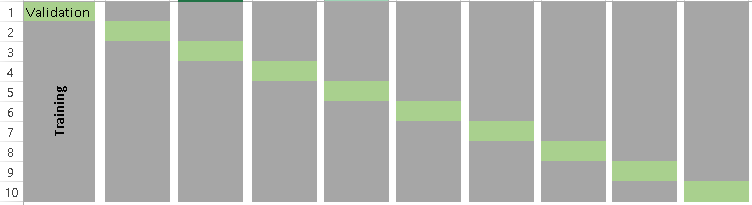


The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.

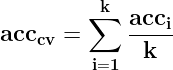

Now, one of most commonly asked questions is, “How to choose the right value of k?”.

Always remember, a lower value of k is more biased, and hence undesirable. On the other hand, a higher value of K is less biased, but can suffer from large variability. It is important to know that a smaller value of k always takes us towards validation set approach, whereas a higher value of k leads to LOOCV approach.

Advantages:

1. The model has low bias

2. Low time complexity

3. The entire dataset is utilized for both training and validation.


DisAdvantages:-

1. Not suitable for an imbalanced dataset.

In [54]:
# Implementation of K-Fold Cross Validation
#from sklearn.model_selection import RepeatedKFold 
#kf = RepeatedKFold(n_splits=2, n_repeats=5, random_state=None) 

#for train_index, test_index in kf.split(X):
    #print("Train:", train_index, "Validation:",test_index)
    #X_train, X_test = X[train_index], X[test_index] 
    #y_train, y_test = y[train_index], y[test_index]

Stratified k-fold cross validation

1. Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

2. For all the cross-validation techniques discussed above, they may not work well with an imbalanced dataset. Stratified k-fold cross-validation solved the problem of an imbalanced dataset.

3. In Stratified k-fold cross-validation, the dataset is partitioned into k groups or folds such that the validation data has an equal number of instances of target class label. This ensures that one particular class is not over present in the validation or train data especially when the dataset is imbalanced.

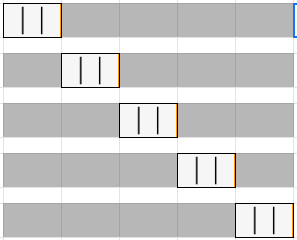

Advantages:-

1. It is generally a better approach when dealing with both bias and variance. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.


DisAdvantages:-

1. Not Suitable for time-series dataset

Code
 from sklearn.model_selection import StratifiedKFold

 skf = StratifiedKFold(n_splits=1, random_state=None)

            for train_index, test_index in skf.split(X,y):

                print("Train:", train_index, "Validation:", val_index)
    
                X_train, X_test = X[train_index], X[val_index] 
    
                y_train, y_test = y[train_index], y[val_index]
                

In [55]:
#Here is an example of stratified 3-fold cross-validation on a dataset with 50 samples from two unbalanced classes. 
#We show the number of samples in each class and compare with KFold.
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
print('Stratified KFold Cross Validation')
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

Stratified KFold Cross Validation
train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]


In [56]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
print('KFold Cross Validation')
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

KFold Cross Validation
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


# Adversarial Validation

1. When dealing with real datasets, there are often cases where the test and train sets are very different. As a result, the internal cross-validation techniques might give scores that are not even in the ballpark of the test score. In such cases, adversarial validation offers an interesting solution.


2. The general idea is to check the degree of similarity between training and tests in terms of feature distribution. If It does not seem to be the case, we can suspect they are quite different. This intuition can be quantified by combining train and test sets, assigning 0/1 labels (0 – train, 1-test) and evaluating a binary classification task.

Let us understand, how this can be accomplished in the below steps:

1. Remove the target variable from the train set

train.drop(['target'], axis = 1, inplace = True)

2. Create a new target variable which is 1 for each row in the train set, and 0 for each row in the test set

train['is_train'] = 1

test['is_train'] = 0

3. Combine the train and test datasets

df = pd.concat([train, test], axis = 0)

4. Using the above newly created target variable, fit a classification model and predict probabilities for each row to be in the test set

y = df['is_train']; df.drop('is_train', axis = 1, inplace = True) 

xgb_params = {'learning_rate': 0.05, 
              'max_depth': 4,
              'subsample': 0.9,        
              'colsample_bytree': 0.9,
              'objective': 'binary:logistic',
              'silent': 1, 
              'n_estimators':100, 
              'gamma':1,         
              'min_child_weight':4}
              
clf = xgb.XGBClassifier(xgb_params, seed = 10)

5. Sort the train set using the calculated probabilities in step 4 and take top n% samples/rows as the validation set (n% is the fraction of the train set you want to keep in the validation set)

probs = clf.predict_proba(x1)[:,1]

new_df = pd.DataFrame({'id':train.id, 'probs':probs})

new_df = new_df.sort_values(by = 'probs', ascending=False) # 30% validation set

val_set_ids = new_df.iloc[1:np.int(new_df.shape[0]*0.3),1]

val_set_ids will get you the ids from the train set that would constitute the validation set which is most similar to the test set. This will make your validation strategy more robust for cases where the train and test sets are highly dissimilar.

However, you must be careful while using this type of validation technique. Once the distribution of the test set changes, the validation set might no longer be a good subset to evaluate your model on.

# Cross Validation for time series

1. Splitting a time-series dataset randomly does not work because the time section of your data will be messed up. For a time  series forecasting problem, we perform cross validation in the following manner.

2. Folds for time series cross valdiation are created in a forward chaining fashion

Example:-

Suppose we have a time series for yearly consumer demand for a product during a period of n years. The folds would be created like:
    
fold 1: training [1], test [2]
    
fold 2: training [1 2], test [3]
    
fold 3: training [1 2 3], test [4]
    
fold 4: training [1 2 3 4], test [5]
    
fold 5: training [1 2 3 4 5], test [6]
.
.
.
fold n: training [1 2 3 ….. n-1], test [n]

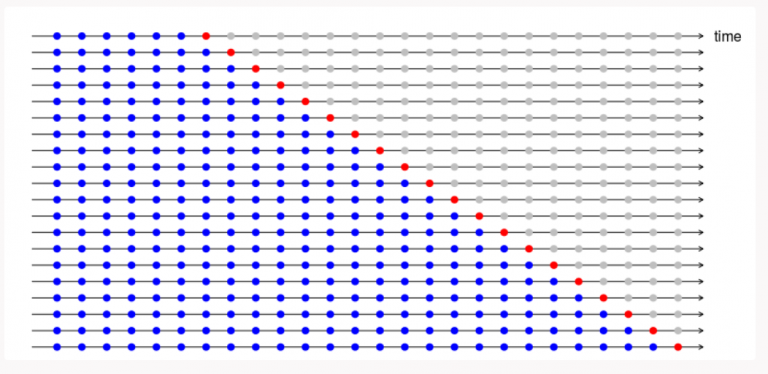

We progressively select a new train and test set. We start with a train set which has a minimum number of observations needed for fitting the model. Progressively, we change our train and test sets with each fold. In most cases, 1 step forecasts might not be very important. In such instances, the forecast origin can be shifted to allow for multi-step errors to be used. For example, in a regression problem, the following code could be used for performing cross validation.

In [57]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(X):
     print("Train:", train_index, "Validation:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

Train: [0] Validation: [1]
Train: [0 1] Validation: [2]
Train: [0 1 2] Validation: [3]


# Custom Cross Validation Techniques

Unfortunately, there is no single method that works best for all kinds of problem statements. Often, a custom cross validation technique based on a feature, or combination of features, could be created if that gives the user stable cross validation scores while making submissions in hackathons.


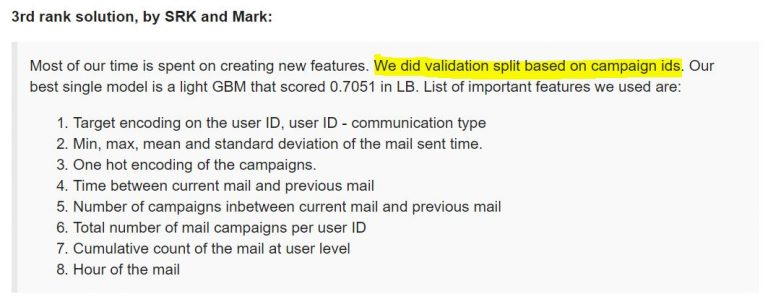

# How to measure the model’s bias-variance?

1. After k-fold cross validation, we’ll get k different model estimation errors (e1, e2 …..ek). In an ideal scenario, these error values should sum up to zero. To return the model’s bias, we take the average of all the errors. Lower the average value, better the model.


2. Similarly for calculating the model variance, we take standard deviation of all the errors. A low value of standard deviation suggests our model does not vary a lot with different subsets of training data.


3. We should focus on achieving a balance between bias and variance. This can be done by reducing the variance and controlling bias to an extent. It’ll result in a better predictive model. This trade-off usually leads to building less complex predictive models as well.